# RNA seq Analysis

In [60]:
import subprocess
import os
import pandas as pd
from pygenome import sg
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from bs4 import BeautifulSoup


import warnings
warnings.filterwarnings('ignore')

In [61]:
project_dir = "/Users/scampione/Projects/Buck_Institute/RNA_seq"
os.chdir(project_dir) 

ref_genome = "/Users/scampione/data/yeast_genome_ncbi/R64_index"
gtf_file = "/Users/scampione/data/yeast_genome_ncbi/genomic.gtf"

sra_accession = "SRR8690267" # SRA accession number for sample we want

## (1) **Data Acquisition**

#### *Download RNA-seq data*

In [12]:
def download_sra_data(sra_accession):
    """
    * Downloads the RNA-seq data from NCBI
    * Software: SRAtoolkit
    """
    subprocess.run(["fasterq-dump", sra_accession, "--split-files", "--threads", "8", "-O", project_dir])

In [ ]:
download_sra_data(sra_accession)

#### *Run Quality Control*

In [59]:
project_dir = "/Users/scampione/Projects/Buck_Institute/RNA_seq/r64_tran"
try:
    os.mkdir(project_dir)
except FileExistsError:
    print("Exists already")
    os.chdir(project_dir)
    print(os.listdir())

Exists already
['genome_tran.7.ht2', 'genome_tran.6.ht2', 'genome_tran.4.ht2', 'genome_tran.5.ht2', 'genome_tran.1.ht2', 'genome_tran.2.ht2', 'genome_tran.3.ht2', 'genome_tran.8.ht2', 'make_r64_tran.sh']


In [ ]:
def run_fastqc():
    """
    * Get quality control report on RNA reads
    * Software: FastQC
    """
    subprocess.run(["fastqc", "-@ 8" ,f"{sra_accession}_1.fastq"])
    subprocess.run(["fastqc", "-@ 8", f"{sra_accession}_2.fastq"])

In [5]:
run_fastqc()

null


Started analysis of SRR8690267_1.fastq
Approx 5% complete for SRR8690267_1.fastq
Approx 10% complete for SRR8690267_1.fastq
Approx 15% complete for SRR8690267_1.fastq
Approx 20% complete for SRR8690267_1.fastq
Approx 25% complete for SRR8690267_1.fastq
Approx 30% complete for SRR8690267_1.fastq
Approx 35% complete for SRR8690267_1.fastq
Approx 40% complete for SRR8690267_1.fastq
Approx 45% complete for SRR8690267_1.fastq
Approx 50% complete for SRR8690267_1.fastq
Approx 55% complete for SRR8690267_1.fastq
Approx 60% complete for SRR8690267_1.fastq
Approx 65% complete for SRR8690267_1.fastq
Approx 70% complete for SRR8690267_1.fastq
Approx 75% complete for SRR8690267_1.fastq
Approx 80% complete for SRR8690267_1.fastq
Approx 85% complete for SRR8690267_1.fastq
Approx 90% complete for SRR8690267_1.fastq
Approx 95% complete for SRR8690267_1.fastq


Analysis complete for SRR8690267_1.fastq
null


Started analysis of SRR8690267_2.fastq
Approx 5% complete for SRR8690267_2.fastq
Approx 10% complete for SRR8690267_2.fastq
Approx 15% complete for SRR8690267_2.fastq
Approx 20% complete for SRR8690267_2.fastq
Approx 25% complete for SRR8690267_2.fastq
Approx 30% complete for SRR8690267_2.fastq
Approx 35% complete for SRR8690267_2.fastq
Approx 40% complete for SRR8690267_2.fastq
Approx 45% complete for SRR8690267_2.fastq
Approx 50% complete for SRR8690267_2.fastq
Approx 55% complete for SRR8690267_2.fastq
Approx 60% complete for SRR8690267_2.fastq
Approx 65% complete for SRR8690267_2.fastq
Approx 70% complete for SRR8690267_2.fastq
Approx 75% complete for SRR8690267_2.fastq
Approx 80% complete for SRR8690267_2.fastq
Approx 85% complete for SRR8690267_2.fastq
Approx 90% complete for SRR8690267_2.fastq
Approx 95% complete for SRR8690267_2.fastq


Analysis complete for SRR8690267_2.fastq


#### *FastQC Report Parsing*

In [12]:
with open(f"{sra_accession}_1_fastqc.html", "r") as file:
    html_report = file.read()

soup = BeautifulSoup(html_report, 'html.parser')

basic_stats_table = soup.find('table')

rows = basic_stats_table.find_all('tr')

basic_stats = {}
for row in rows:
    cols = row.find_all('td')
    if len(cols) > 1:
        key = cols[0].text.strip()
        value = cols[1].text.strip()
        basic_stats[key] = value

print("* Filename:",basic_stats['Filename'])
print("* Sequences flagged as poor quality:", basic_stats['Sequences flagged as poor quality'])


with open(f"{sra_accession}_2_fastqc.html", "r") as file:
    html_report = file.read()

soup = BeautifulSoup(html_report, 'html.parser')


basic_stats_table = soup.find('table')
rows = basic_stats_table.find_all('tr')


basic_stats = {}
for row in rows:
    cols = row.find_all('td')
    if len(cols) > 1:
        key = cols[0].text.strip()
        value = cols[1].text.strip()
        basic_stats[key] = value


print("\n* Filename:",basic_stats['Filename'])
print("* Sequences flagged as poor quality:", basic_stats['Sequences flagged as poor quality'])

* Filename: SRR8690267_1.fastq
* Sequences flagged as poor quality: 0

* Filename: SRR8690267_2.fastq
* Sequences flagged as poor quality: 0


Quality reports of both strands seem good.

## (2) **Alignment with HISAT2**

In [14]:
def run_hisat2():
    """
    * Align the reads to the reference genome using HISAT2
    * Software: HISAT2
    """
    subprocess.run(["hisat2", "-p", "8", "-x", ref_genome, "-1", f"{sra_accession}_1.fastq", "-2", f"{sra_accession}_2.fastq", "-S", f"{sra_accession}.sam"])

In [29]:
run_hisat2()

25995531 reads; of these:
  25995531 (100.00%) were paired; of these:
    998409 (3.84%) aligned concordantly 0 times
    23429449 (90.13%) aligned concordantly exactly 1 time
    1567673 (6.03%) aligned concordantly >1 times
    ----
    998409 pairs aligned concordantly 0 times; of these:
      141775 (14.20%) aligned discordantly 1 time
    ----
    856634 pairs aligned 0 times concordantly or discordantly; of these:
      1713268 mates make up the pairs; of these:
        1252374 (73.10%) aligned 0 times
        399896 (23.34%) aligned exactly 1 time
        60998 (3.56%) aligned >1 times
97.59% overall alignment rate


97.59% overall alignment rate is great!


## (3) **Post-Alignment Processing**

#### *Convert, Sort, and Index BAM Files*


In [15]:
def process_bam():
    """
    * Convert SAM to BAM, sort and index BAM file
    * Software: SAMtools
    """
    subprocess.run(["samtools", "view", "-bS", f"{sra_accession}.sam", "-o", f"{sra_accession}.bam"])
    subprocess.run(["samtools", "sort", f"{sra_accession}.bam", "-o", f"{sra_accession}_sorted.bam"])
    subprocess.run(["samtools", "index", f"{sra_accession}_sorted.bam"])

In [30]:
process_bam()

[bam_sort_core] merging from 15 files and 1 in-memory blocks...


## (4) **Read Counting with featureCounts**


In [16]:
def run_feature_counts():
    """
    * Quantify the reads to get gene expression levels
    * Software: FeatureCounts
    """    
    subprocess.run(["featureCounts", "-T", "8", "-p", "-a", gtf_file, "-o", f"{sra_accession}/{sra_accession}_gene_counts.txt", f"{sra_accession}_sorted.bam"])

In [33]:
run_feature_counts() # added -p bc paried


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 1 BAM file                                       ||
||                           o SRR8690267_sorted.bam                          ||
||                                                                            ||
||             Output file : gene_counts.txt                                  ||
||                 Summary : gene_counts.txt.summary             

## (5) **Normalization of Read Counts**


In [28]:
gene_counts_file = "/Users/scampione/Projects/Buck_Institute/RNA_seq/SRR8690267/gene_counts.txt"

gene_counts_df = pd.read_csv(gene_counts_file, sep='\t', comment='#') 
gene_counts_df.head()

,Geneid,Chr,Start,End,Strand,Length,SRR8690267_sorted.bam
0,YDL246C,IV,8683,9756,-,1074,7
1,YDL243C,IV,17577,18566,-,990,552
2,YDR387C,IV,1248154,1249821,-,1668,822
3,YDL094C,IV,289572,290081,-,510,18
4,YDR438W,IV,1338274,1339386,+,1113,838


In [29]:
gene_counts_df.columns = ['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length', 'Count']

#### *Calculate TPM*


In [30]:
gene_counts_df['RPK'] = gene_counts_df['Count'] / (gene_counts_df['Length'] / 1000) # Calculate RPK

# Sum of RPKs
sum_rpk = gene_counts_df['RPK'].sum()

# Calculate TPM
gene_counts_df['TPM'] = gene_counts_df['RPK'] / sum_rpk * 1e6

## (6) **Analysis of Paralogous Genes**


#### *Mapping Standard Gene Names to Gene IDs*


In [27]:
prlgs = ["RPL1A","RPL1B","RPL2A","RPL2B","RPL12A","RPL12B","RPL18A","RPL18B","RPL19A","RPL19B",
         "RPL20A","RPL20B","RPL23A","RPL23B","RPL35A","RPL35B","RPL40A","RPL40B","RPL41A","RPL41B",
         "RPL42A","RPL42B","RPL43A","RPL43B","RPS4A","RPS4B","RPS6A","RPS6B","RPS8A","RPS8B","RPS11A",
         "RPS11B","RPS16A","RPS16B","RPS18A","RPS18B","RPS23A","RPS23B","RPS24A","RPS24B","RPS30A",
         "RPS30B"]


prlgs_dct = {str(sg.stdgene[mygene]).split('/')[-1]: str(sg.stdgene[mygene]).split(' ')[1].split('/')[0] for mygene in prlgs}

prlgs_gene_ids = list(prlgs_dct.keys())

In [31]:
filtered_df = gene_counts_df[gene_counts_df['Geneid'].isin(prlgs_gene_ids)]

filtered_df['Standard_Gene_Name'] = filtered_df['Geneid'].map(prlgs_dct)

sorted_df = filtered_df.sort_values(by='Standard_Gene_Name')

sorted_df

,Geneid,Chr,Start,End,Strand,Length,Count,RPK,TPM,Standard_Gene_Name
5639,YEL054C,V,52721,53218,-,498,10265,20612.449799,842.888367,RPL12A
366,YDR418W,IV,1301616,1302113,+,498,9838,19755.020080,807.826182,RPL12B
937,YOL120C,XV;XV,93395;94291,93843;94402,-;-,561,43088,76805.704100,3140.754018,RPL18A
4419,YNL301C,XIV;XIV,63570;64451,64018;64562,-;-,561,11086,19761.140820,808.076472,RPL18B
4155,YBR084C-A,II;II,414186;415260,414753;415261,-;-,570,30670,53807.017544,2200.287186,RPL19A
4015,YBL027W,II;II,168423;168809,168424;169376,+;+,570,45115,79149.122807,3236.581558,RPL19B
3064,YPL220W,XVI,135790,136443,+,654,18472,28244.648318,1154.985736,RPL1A
2062,YGL135W,VII,254641,255294,+,654,27520,42079.510703,1720.723661,RPL1B
3608,YMR242C,XIII,753225,753742,-,518,28692,55389.961390,2265.017238,RPL20A
1234,YOR312C,XV,900250,900767,-,518,30836,59528.957529,2434.269886,RPL20B


#### *Calculate Differences in TPM*


In [32]:
prlg_pairs = [(base_gene+"A", base_gene+"B") for base_gene in {prlg[:-1] for prlg in prlgs}]

diff_df = pd.DataFrame(columns=["ParalogA", "ParalogB", "TPM_Difference(A-B)"])
p1s, p2s, diffs = [], [], []


for paralog1, paralog2 in prlg_pairs:
    count_p1 = sorted_df[sorted_df["Standard_Gene_Name"] == paralog1]['TPM'].values[0]
    count_p2 = sorted_df[sorted_df["Standard_Gene_Name"] == paralog2]['TPM'].values[0]
    
    diff = count_p1 - count_p2
    
    diffs.append(diff)
    p1s.append(paralog1) 
    p2s.append(paralog2)

diff_df['ParalogA'] = p1s
diff_df['ParalogB'] = p2s
diff_df['TPM_Difference(A-B)'] = diffs

diff_df

,ParalogA,ParalogB,TPM_Difference(A-B)
0,RPL41A,RPL41B,2620.246191
1,RPS30A,RPS30B,3300.128123
2,RPL19A,RPL19B,-1036.294372
3,RPL1A,RPL1B,-565.737924
4,RPS23A,RPS23B,-214.170550
5,RPL18A,RPL18B,2332.677546
6,RPL23A,RPL23B,-572.885858
7,RPL20A,RPL20B,-169.252647
8,RPL2A,RPL2B,-1042.350131
9,RPS16A,RPS16B,-297.604326


In [33]:
# Save Output to Excel
diff_df.to_excel("paralogs_diff_TPM.xlsx", index=False)
sorted_df.to_excel("paralogs_gene_quantification.xlsx", index=False)

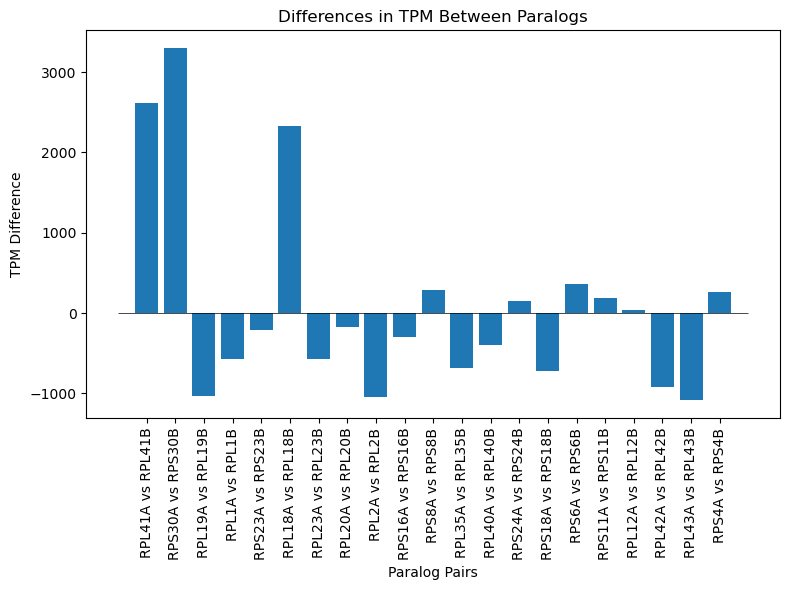

In [34]:
plt.figure(figsize=(8, 6))
plt.bar(diff_df.index, diff_df['TPM_Difference(A-B)'])
plt.xlabel('Paralog Pairs')
plt.ylabel('TPM Difference')
plt.title('Differences in TPM Between Paralogs')
plt.xticks(diff_df.index, labels=diff_df['ParalogA'] + ' vs ' + diff_df['ParalogB'], rotation=90)
plt.hlines(y=0, xmin=-1, xmax=21, colors='black', linewidth=.5)
plt.tight_layout()
plt.show()


In [35]:
basenames = [i[:-1] for i in sorted_df['Standard_Gene_Name']]
p_distinction = [i[-1] for i in sorted_df['Standard_Gene_Name']]

sorted_df['Base_Gene_Name'] = basenames
sorted_df['Paralog_Distinction'] = p_distinction
sorted_df

,Geneid,Chr,Start,End,Strand,Length,Count,RPK,TPM,Standard_Gene_Name,Base_Gene_Name,Paralog_Distinction
5639,YEL054C,V,52721,53218,-,498,10265,20612.449799,842.888367,RPL12A,RPL12,A
366,YDR418W,IV,1301616,1302113,+,498,9838,19755.020080,807.826182,RPL12B,RPL12,B
937,YOL120C,XV;XV,93395;94291,93843;94402,-;-,561,43088,76805.704100,3140.754018,RPL18A,RPL18,A
4419,YNL301C,XIV;XIV,63570;64451,64018;64562,-;-,561,11086,19761.140820,808.076472,RPL18B,RPL18,B
4155,YBR084C-A,II;II,414186;415260,414753;415261,-;-,570,30670,53807.017544,2200.287186,RPL19A,RPL19,A
4015,YBL027W,II;II,168423;168809,168424;169376,+;+,570,45115,79149.122807,3236.581558,RPL19B,RPL19,B
3064,YPL220W,XVI,135790,136443,+,654,18472,28244.648318,1154.985736,RPL1A,RPL1,A
2062,YGL135W,VII,254641,255294,+,654,27520,42079.510703,1720.723661,RPL1B,RPL1,B
3608,YMR242C,XIII,753225,753742,-,518,28692,55389.961390,2265.017238,RPL20A,RPL20,A
1234,YOR312C,XV,900250,900767,-,518,30836,59528.957529,2434.269886,RPL20B,RPL20,B


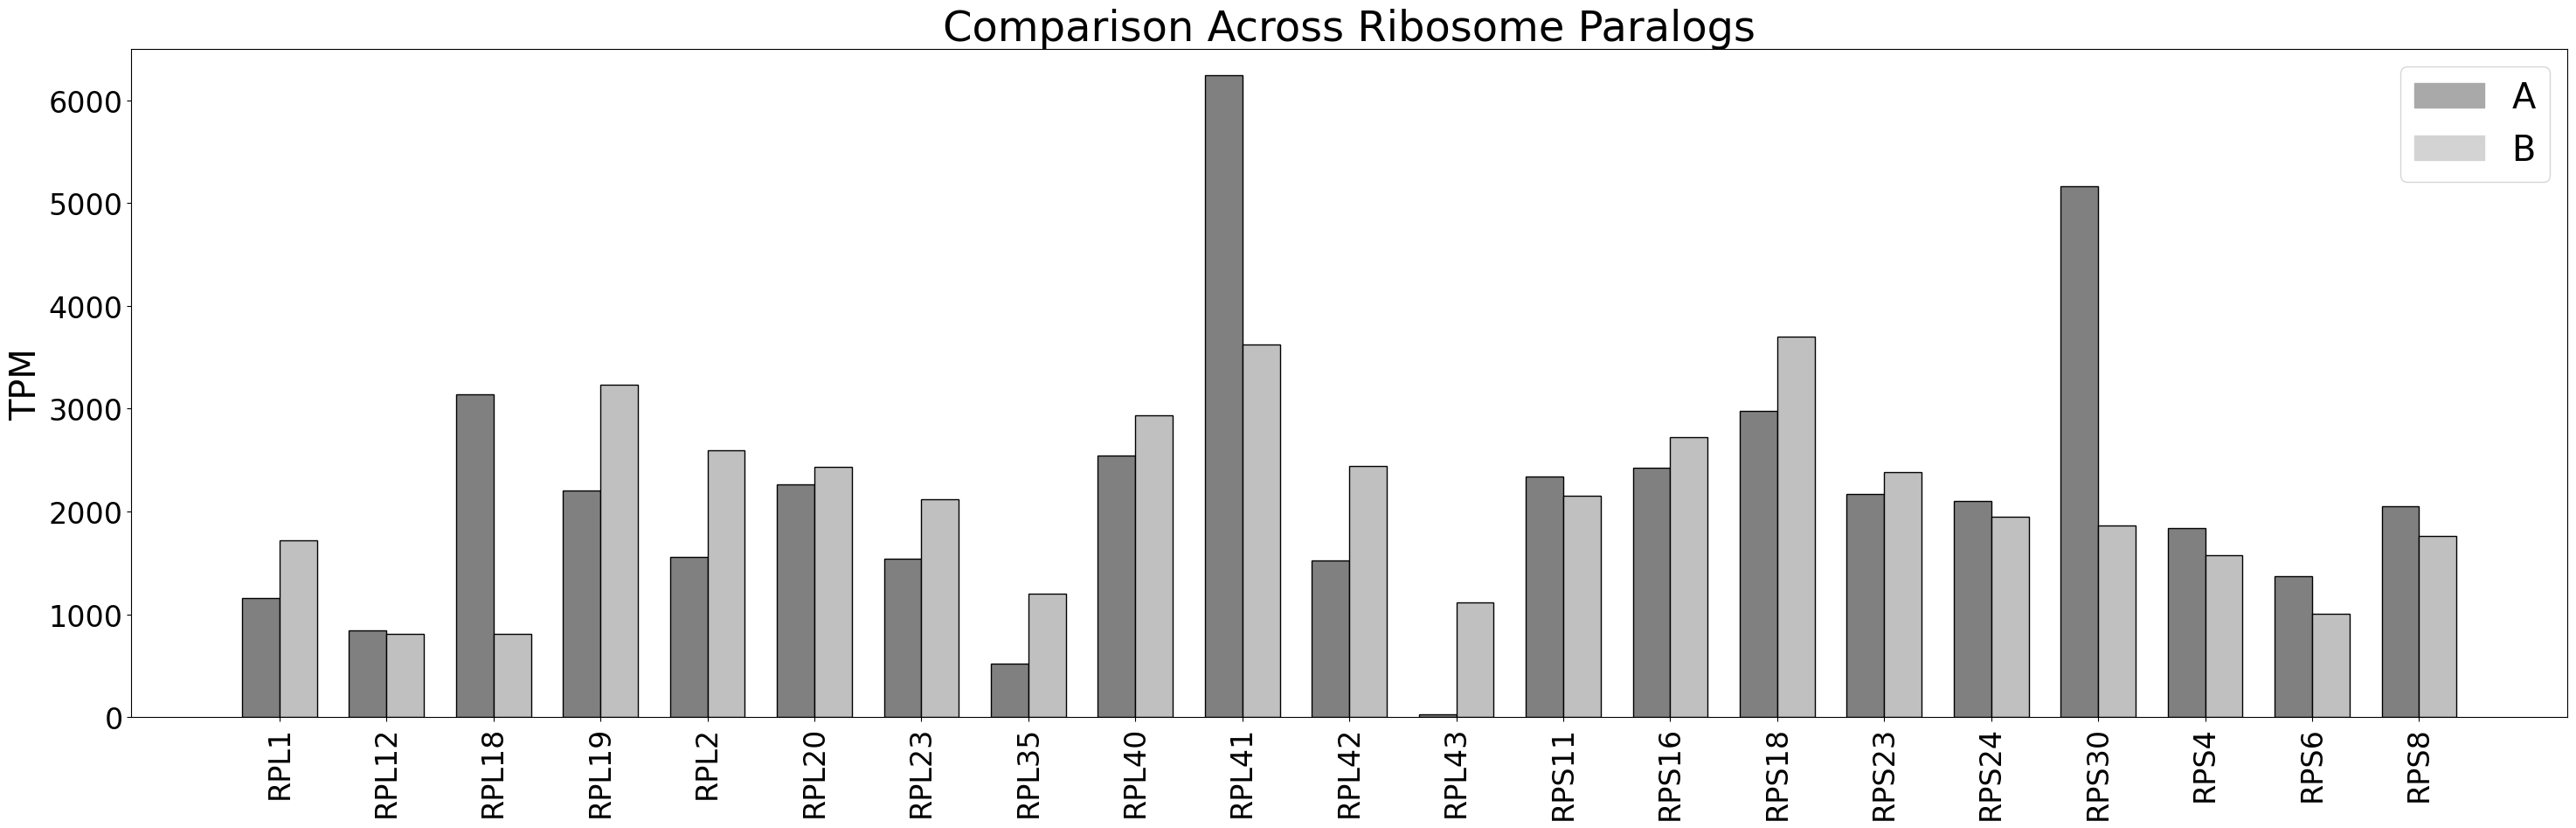

In [36]:
grouped = sorted_df.groupby('Base_Gene_Name')


plt.rcParams.update({'font.size': 24})
plt.figure(figsize=(30, 10))

# Create custom legend patches
legend_patches = [mpatches.Patch(color='darkgray', label='A'),
                  mpatches.Patch(color='lightgray', label='B')]

bar_width = 0.35

for i, (base_gene_name, group) in enumerate(grouped):
    plt.bar(i, group[group['Paralog_Distinction'] == 'A']['TPM'], color='gray', width=bar_width, edgecolor='black')
    plt.bar(i + bar_width, group[group['Paralog_Distinction'] == 'B']['TPM'], color='#C0C0C0', width=bar_width, edgecolor='black')

plt.xticks([r + bar_width/2 for r in range(len(grouped))], [name for name, _ in grouped], rotation=90)


plt.legend(handles=legend_patches, fontsize='large')


plt.ylabel('TPM', fontsize='large')
plt.title('Comparison Across Ribosome Paralogs', fontsize='x-large')
plt.ylim(0, 6500)

plt.tight_layout()
plt.savefig("tpm_across_ribosome_paralogs.png")
plt.show()


# *Repeat for other samples*

### SRR6761665 (normal condition rep 1)

In [3]:
project_dir = "/Users/scampione/Projects/Buck_Institute/RNA_seq/SRR6761665"
os.chdir(project_dir)

sra_accession = "SRR6761665"

download_sra_data(sra_accession)
run_fastqc()

In [12]:
run_hisat2()
process_bam()
run_feature_counts()

34583649 reads; of these:
  34583649 (100.00%) were paired; of these:
    1421677 (4.11%) aligned concordantly 0 times
    31059755 (89.81%) aligned concordantly exactly 1 time
    2102217 (6.08%) aligned concordantly >1 times
    ----
    1421677 pairs aligned concordantly 0 times; of these:
      21686 (1.53%) aligned discordantly 1 time
    ----
    1399991 pairs aligned 0 times concordantly or discordantly; of these:
      2799982 mates make up the pairs; of these:
        1706626 (60.95%) aligned 0 times
        995450 (35.55%) aligned exactly 1 time
        97906 (3.50%) aligned >1 times
97.53% overall alignment rate
[bam_sort_core] merging from 18 files and 1 in-memory blocks...

        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
            

### SRR6761666 (normal condition rep 2)

In [5]:
project_dir = "/Users/scampione/Projects/Buck_Institute/RNA_seq/SRR6761666"
os.mkdir(project_dir)
os.chdir(project_dir)


In [6]:
! prefetch SRR6761666


2024-01-23T18:09:10 prefetch.3.0.10: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2024-01-23T18:09:11 prefetch.3.0.10: 1) Downloading 'SRR6761666'...
2024-01-23T18:09:11 prefetch.3.0.10: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2024-01-23T18:09:11 prefetch.3.0.10:  Downloading via HTTPS...
2024-01-23T18:10:50 prefetch.3.0.10:  HTTPS download succeed
2024-01-23T18:10:52 prefetch.3.0.10:  'SRR6761666' is valid
2024-01-23T18:10:52 prefetch.3.0.10: 1) 'SRR6761666' was downloaded successfully
2024-01-23T18:10:53 prefetch.3.0.10: 'SRR6761666' has 0 unresolved dependencies


In [23]:
! ls

SRR6761666.sra     SRR6761666_1.fastq SRR6761666_2.fastq


In [24]:
sra_accession = "SRR6761666"
# download_sra_data(sra_accession)
run_fastqc()

chemical/x-fastq


Started analysis of SRR6761666_1.fastq
Approx 5% complete for SRR6761666_1.fastq
Approx 10% complete for SRR6761666_1.fastq
Approx 15% complete for SRR6761666_1.fastq
Approx 20% complete for SRR6761666_1.fastq
Approx 25% complete for SRR6761666_1.fastq
Approx 30% complete for SRR6761666_1.fastq
Approx 35% complete for SRR6761666_1.fastq
Approx 40% complete for SRR6761666_1.fastq
Approx 45% complete for SRR6761666_1.fastq
Approx 50% complete for SRR6761666_1.fastq
Approx 55% complete for SRR6761666_1.fastq
Approx 60% complete for SRR6761666_1.fastq
Approx 65% complete for SRR6761666_1.fastq
Approx 70% complete for SRR6761666_1.fastq
Approx 75% complete for SRR6761666_1.fastq
Approx 80% complete for SRR6761666_1.fastq
Approx 85% complete for SRR6761666_1.fastq
Approx 90% complete for SRR6761666_1.fastq
Approx 95% complete for SRR6761666_1.fastq


Analysis complete for SRR6761666_1.fastq


chemical/x-fastq


Started analysis of SRR6761666_2.fastq
Approx 5% complete for SRR6761666_2.fastq
Approx 10% complete for SRR6761666_2.fastq
Approx 15% complete for SRR6761666_2.fastq
Approx 20% complete for SRR6761666_2.fastq
Approx 25% complete for SRR6761666_2.fastq
Approx 30% complete for SRR6761666_2.fastq
Approx 35% complete for SRR6761666_2.fastq
Approx 40% complete for SRR6761666_2.fastq
Approx 45% complete for SRR6761666_2.fastq
Approx 50% complete for SRR6761666_2.fastq
Approx 55% complete for SRR6761666_2.fastq
Approx 60% complete for SRR6761666_2.fastq
Approx 65% complete for SRR6761666_2.fastq
Approx 70% complete for SRR6761666_2.fastq
Approx 75% complete for SRR6761666_2.fastq
Approx 80% complete for SRR6761666_2.fastq
Approx 85% complete for SRR6761666_2.fastq
Approx 90% complete for SRR6761666_2.fastq
Approx 95% complete for SRR6761666_2.fastq


Analysis complete for SRR6761666_2.fastq


In [25]:
run_hisat2()
process_bam()
run_feature_counts()

37606874 reads; of these:
  37606874 (100.00%) were paired; of these:
    2031128 (5.40%) aligned concordantly 0 times
    33055369 (87.90%) aligned concordantly exactly 1 time
    2520377 (6.70%) aligned concordantly >1 times
    ----
    2031128 pairs aligned concordantly 0 times; of these:
      18495 (0.91%) aligned discordantly 1 time
    ----
    2012633 pairs aligned 0 times concordantly or discordantly; of these:
      4025266 mates make up the pairs; of these:
        2413827 (59.97%) aligned 0 times
        1461306 (36.30%) aligned exactly 1 time
        150133 (3.73%) aligned >1 times
96.79% overall alignment rate
[bam_sort_core] merging from 20 files and 1 in-memory blocks...

        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
          

In [62]:
gene_counts_file2 = "/Users/scampione/Projects/Buck_Institute/RNA_seq/SRR6761665/SRR6761665_gene_counts.txt"
gene_counts_file3 = "/Users/scampione/Projects/Buck_Institute/RNA_seq/SRR6761666/SRR6761666_gene_counts.txt"

gene_counts_df2 = pd.read_csv(gene_counts_file2, sep='\t', comment='#') 
gene_counts_df3 = pd.read_csv(gene_counts_file3, sep='\t', comment='#') 

cols = ['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length', 'Count']
gene_counts_df2.columns = cols
gene_counts_df3.columns = cols

gene_counts_df2['RPK'] = gene_counts_df2['Count'] / (gene_counts_df2['Length'] / 1000) # Calculate RPK
gene_counts_df3['RPK'] = gene_counts_df3['Count'] / (gene_counts_df3['Length'] / 1000) 

sum_rpk2 = gene_counts_df2['RPK'].sum() # Sum of RPKs
sum_rpk3 = gene_counts_df3['RPK'].sum()

gene_counts_df2['TPM'] = gene_counts_df2['RPK'] / sum_rpk2 * 1e6
gene_counts_df3['TPM'] = gene_counts_df3['RPK'] / sum_rpk3 * 1e6

filtered_df2 = gene_counts_df2[gene_counts_df2['Geneid'].isin(prlgs_gene_ids)]
filtered_df3 = gene_counts_df3[gene_counts_df3['Geneid'].isin(prlgs_gene_ids)]


filtered_df2['Standard_Gene_Name'] = filtered_df2['Geneid'].map(prlgs_dct)
filtered_df3['Standard_Gene_Name'] = filtered_df3['Geneid'].map(prlgs_dct)


sorted_df2 = filtered_df2.sort_values(by='Standard_Gene_Name')
sorted_df3 = filtered_df3.sort_values(by='Standard_Gene_Name')


diff_df_2 = pd.DataFrame(columns=["ParalogA", "ParalogB", "TPM_Difference(A-B)"])
diff_df_3 = pd.DataFrame(columns=["ParalogA", "ParalogB", "TPM_Difference(A-B)"])

p1s2, p2s2, diffs2 = [], [], []
p1s3, p2s3, diffs3 = [], [], []

for paralog1, paralog2 in prlg_pairs:
    count_p1_2 = sorted_df2[sorted_df2["Standard_Gene_Name"] == paralog1]['TPM'].values[0]
    count_p2_2 = sorted_df2[sorted_df2["Standard_Gene_Name"] == paralog2]['TPM'].values[0]

    count_p1_3 = sorted_df3[sorted_df3["Standard_Gene_Name"] == paralog1]['TPM'].values[0]
    count_p2_3 = sorted_df3[sorted_df3["Standard_Gene_Name"] == paralog2]['TPM'].values[0]    
    
    diff_2 = count_p1_2 - count_p2_2
    diff_3 = count_p1_3 - count_p2_3
    
    diffs2.append(diff_2)
    p1s2.append(paralog1) 
    p2s2.append(paralog2)

    diffs3.append(diff_3)
    p1s3.append(paralog1) 
    p2s3.append(paralog2)

diff_df_2['ParalogA'] = p1s2
diff_df_2['ParalogB'] = p2s2
diff_df_2['TPM_Difference(A-B)'] = diffs2

diff_df_3['ParalogA'] = p1s3
diff_df_3['ParalogB'] = p2s3
diff_df_3['TPM_Difference(A-B)'] = diffs3


In [63]:
sorted_df2.columns

Index(['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length', 'Count', 'RPK',
       'TPM', 'Standard_Gene_Name'],
      dtype='object')

In [64]:
sorted_df[['Geneid', "Standard_Gene_Name", "Length", "TPM"]]

,Geneid,Standard_Gene_Name,Length,TPM
5639,YEL054C,RPL12A,498,842.888367
366,YDR418W,RPL12B,498,807.826182
937,YOL120C,RPL18A,561,3140.754018
4419,YNL301C,RPL18B,561,808.076472
4155,YBR084C-A,RPL19A,570,2200.287186
4015,YBL027W,RPL19B,570,3236.581558
3064,YPL220W,RPL1A,654,1154.985736
2062,YGL135W,RPL1B,654,1720.723661
3608,YMR242C,RPL20A,518,2265.017238
1234,YOR312C,RPL20B,518,2434.269886


In [65]:
merged = diff_df_2.merge(diff_df_3, on=['ParalogA', 'ParalogB' ]).merge(diff_df, on=['ParalogA', 'ParalogB'])
merged.columns = 'ParalogA', 'ParalogB', 'TPM_Difference(A-B)_S2', 'TPM_Difference(A-B)_S3', 'TPM_Difference(A-B)_S1'
merged.sort_values("ParalogA")

,ParalogA,ParalogB,TPM_Difference(A-B)_S2,TPM_Difference(A-B)_S3,TPM_Difference(A-B)_S1
17,RPL12A,RPL12B,-524.686687,-352.678609,35.062185
5,RPL18A,RPL18B,1282.413270,936.694565,2332.677546
2,RPL19A,RPL19B,-274.792749,-328.696253,-1036.294372
3,RPL1A,RPL1B,-173.207051,-114.406892,-565.737924
7,RPL20A,RPL20B,33.574482,120.163524,-169.252647
6,RPL23A,RPL23B,-591.740257,-492.398238,-572.885858
8,RPL2A,RPL2B,-61.431527,40.658506,-1042.350131
11,RPL35A,RPL35B,-434.019231,-385.078036,-683.339035
12,RPL40A,RPL40B,233.245996,188.730634,-392.860956
0,RPL41A,RPL41B,549.056676,299.578930,2620.246191
